In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpflkqu5xoGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/siim/png_images.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/siim/png_masks.npy')

In [6]:
import omama as O

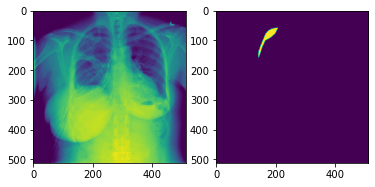

In [7]:
O.DataToNpyFiles.show_image_and_mask(images[1300], masks[1300])

In [8]:
len(images)

12047

In [9]:
images.shape

(12047, 512, 512, 1)

In [10]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [11]:
#
#
R.setup_data(images, masks, dataset_size=12047, weights=weights)

Weights OK!


In [13]:
RUNS = 5

In [14]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
10/10 [==============================] - 38s 2s/step - loss: 1.2196 - dice_coeff: 0.3896 - val_loss: 1.4051 - val_dice_coeff: 0.6256
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 0.7217 - dice_coeff: 0.4894 - val_loss: 1.4112 - val_dice_coeff: 0.6243
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 0.4175 - dice_coeff: 0.5467 - val_loss: 1.3588 - val_dice_coeff: 0.6350
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: -0.0075 - dice_coeff: 0.6101 - val_loss: 1.3260 - val_dice_coeff: 0.6416
Epoch 5/100
10/10 [==============================] - 14s 1s/step - loss: -0.2015 - dice_coeff: 0.6087 - val_loss: 1.2773 - val_dice_coeff: 0.6514
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: -1.3090 - dice_coeff: 0.7242 - val_loss: 1.2342 - val_dice_coeff: 0.6600
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: -1.7236 - dice_coeff: 0.7547 - val_loss: 1.

Replacing 117 from 353 !
D_relabeled_ 117
selected_ids ['571b568b-1297-4642-aea3-c120837edb31', 'bb722469-ac01-4738-aa50-1af745e1a17d', 'cd807ad9-0ae6-4498-a7f6-b80a3a9291c9', 'dcfb8f37-46f9-4dec-a53f-951b58d8fee0', 'df3f09b1-4abf-4af3-886f-9ea246143c54', '7c36acb5-500c-4a0b-8f35-c032410b8365', 'ed355d31-8827-4043-88df-c8de000cd2e4', 'dce003a1-03ed-4bde-9c4a-cdeacf89f547', 'e62f8195-444e-49bf-8e19-4ca1de65ea2e', '4bae9e91-87ea-455c-8a6f-0a12cd517176', '9b015a24-5612-4bed-a5ed-9d636b2151d0', '12214ed5-be5f-47a8-846f-d9c04ee5f9fa', 'af3b5b51-c36c-4bbf-8404-cf85752f34b7', '55a10d0b-7485-4ed2-ae10-c079095411e0', '9f50f9e6-c9eb-4f5d-87c9-aa6c9c5a75b1', 'afbac716-175d-4294-9058-4828cdea5e39', '81ac86f6-b408-4b95-8c98-b7d78f3a64e3', 'c674f275-d147-44e5-9051-f1183d9a5247', 'c323e9ca-f740-46de-b18c-5cc00bbd77d5', '6e3317c7-2290-42a5-a2fd-e7cc734993d5', 'bf69bc9c-fabd-473b-aba5-686ae833c40f', 'fe7fd169-ea86-4b09-b584-95106bc0599a', '5592d9f6-9a9b-4449-b061-fccc8e2d26d4', '5ee3ebed-2641-47ec-be85

Epoch 1/100
12/12 [==============================] - 19s 2s/step - loss: -3.5273 - dice_coeff: 0.8620 - val_loss: 2.3031 - val_dice_coeff: 0.4517
Epoch 2/100
12/12 [==============================] - 16s 1s/step - loss: -4.5847 - dice_coeff: 0.9970 - val_loss: 2.4168 - val_dice_coeff: 0.4304
Epoch 3/100
12/12 [==============================] - 15s 1s/step - loss: -5.3197 - dice_coeff: 1.1052 - val_loss: 2.5424 - val_dice_coeff: 0.4085
Epoch 4/100
12/12 [==============================] - 16s 1s/step - loss: -5.9707 - dice_coeff: 1.1745 - val_loss: 2.5401 - val_dice_coeff: 0.4088
Epoch 5/100
12/12 [==============================] - 15s 1s/step - loss: -5.5808 - dice_coeff: 1.1475 - val_loss: 2.6775 - val_dice_coeff: 0.3863
Epoch 6/100
12/12 [==============================] - 16s 1s/step - loss: -6.1855 - dice_coeff: 1.2425 - val_loss: 2.6050 - val_dice_coeff: 0.3994
Epoch 7/100
12/12 [==============================] - 15s 1s/step - loss: -6.6706 - dice_coeff: 1.2838 - val_loss: 2.3556 - v

Replacing 96 from 288 !
D_relabeled_ 96
selected_ids ['0deed188-6fc4-4d88-aff5-55ee20257258', 'a08d9fc4-e016-48f4-8984-8ddd98fa67fa', '9dce79cb-aa09-43a0-856e-6d44741f68f6', '3d109c5a-8937-4355-b8a0-dc078c50f3f9', '6bf52439-a382-41b4-892e-d2d8351d8b13', '2b3501d2-ee45-4c5d-bc0b-b9abd0b99874', '2868dc4b-aa7f-4bb6-9e68-08b02aa00181', '8c8e9961-38f2-4dfb-85dd-1c304118c1c0', '796d7284-c171-4489-a217-9d92013f422f', 'f04d4dfb-765f-49ca-87c6-56fae2d5885a', 'baddc87b-517e-40a2-a3f4-b179b0f17a1a', 'd255c9c1-a7f6-473e-af5e-c27604d902e6', 'f0841bd3-0c42-44ab-bd21-6e46336958ab', '2d5b3084-3907-4aa2-94a7-7be3fdafb8ea', '3fe5eb7a-ae25-493d-b9a1-ca4cc3ceabac', '6d68f978-b220-4b84-91d3-6a35a446c61f', 'c30c77ff-8732-41aa-8992-19d27e50af0e', '2194a18d-63b3-4faf-b309-a5d24d73999e', 'dd073e14-3b7c-45a5-8cea-a3cc95d9536c', '23e7d4ab-65be-4631-81b9-f10f6929a981', '31c7238f-f602-4406-97a4-7b6c38cc23d7', 'cd881bdc-c39c-4c8d-bb51-b4684c88a556', 'd1fa5eab-b17c-4e7b-a5a0-bf30d7c78eab', '85238b88-8467-4c3b-bb2b-8

13/13 [==============================] - 17s 1s/step - loss: -7.6896 - dice_coeff: 1.2968 - val_loss: 2.2833 - val_dice_coeff: 0.4179
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: -8.5235 - dice_coeff: 1.3831 - val_loss: 1.9378 - val_dice_coeff: 0.4398
Epoch 5/100
13/13 [==============================] - 17s 1s/step - loss: -8.8425 - dice_coeff: 1.4130 - val_loss: 2.0007 - val_dice_coeff: 0.4416
Epoch 6/100
13/13 [==============================] - 17s 1s/step - loss: -8.6362 - dice_coeff: 1.4126 - val_loss: 2.7526 - val_dice_coeff: 0.3702
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: -8.7911 - dice_coeff: 1.3123 - val_loss: 2.7608 - val_dice_coeff: 0.3619
Model saved to /tmp/tmpflkqu5xoGP2/unet_2.model
History saved to /tmp/tmpflkqu5xoGP2/history_2.pickle
Testing the classifier...
113/113 [==============================] - 11s 100ms/step - loss: 2.4573 - dice_coeff: 0.3190
Testing the discriminator...
23/23 [========================

Replacing 67 from 201 !
D_relabeled_ 67
selected_ids ['b6d0cb5e-3706-4776-85cf-f21a1293e7b8', '6714ac2d-7763-4847-8485-a1062ba1b714', '2eec4a55-b8a7-47a1-801b-10ba680dd0cb', '0b15ee3c-5a67-4deb-9b49-b6f503b32541', '9eaae708-2eab-47c4-8acb-0e8b02ae96d3', '15b0c242-d329-4772-9d8c-22436d0a9d27', 'e67f4751-d262-46ef-9792-8d8ea6cf7a6e', 'cc670b54-270e-4ee9-a7a0-f592d1a21d9b', '1ab12d49-63f3-4829-a4f7-38c007a16b5f', '4948730a-35cc-4c6a-9a4a-cfee9459bc42', 'fa9fb4dd-5021-4954-ad7e-e029e8bd67e7', 'fdcf2bf8-f80a-4d2a-8337-4bbcdf38a5e4', '588c21bd-b4bf-40ea-b46c-9df86826c73f', '9ea51eb9-4109-4119-bba1-6234082c657a', '9cc715fb-4b90-495b-bc61-97476c2f161c', '28bbb6af-4a42-4cac-be29-4763447e7d6f', 'b6470714-1ad9-42dc-85dc-9406d91fe2fa', '7d3c7b30-3c78-4ca2-890b-79c1951f92f0', '5cbc9f01-2d07-4fed-bab5-2d873c286320', '2037c3c5-cffc-4d96-8ccd-75f8486104f0', 'bf6c710a-f803-4835-97fb-5c8f9d03c33e', 'c576b9b7-992e-458a-b5fb-87ba3c2b5b37', '8f5f1ad1-3d19-4bbc-9f5b-40272f60f87f', 'd4ad1b43-37b1-481a-adf5-b

Epoch 1/100
14/14 [==============================] - 26s 2s/step - loss: -10.1136 - dice_coeff: 1.4926 - val_loss: 1.5539 - val_dice_coeff: 0.4564
Epoch 2/100
14/14 [==============================] - 18s 1s/step - loss: -10.2455 - dice_coeff: 1.5242 - val_loss: 2.7591 - val_dice_coeff: 0.3560
Epoch 3/100
14/14 [==============================] - 17s 1s/step - loss: -9.6599 - dice_coeff: 1.5004 - val_loss: -0.0275 - val_dice_coeff: 0.5503
Epoch 4/100
14/14 [==============================] - 18s 1s/step - loss: -10.2321 - dice_coeff: 1.5216 - val_loss: 2.5711 - val_dice_coeff: 0.3579
Model saved to /tmp/tmpflkqu5xoGP2/unet_4.model
History saved to /tmp/tmpflkqu5xoGP2/history_4.pickle
Testing the classifier...
113/113 [==============================] - 11s 100ms/step - loss: 2.4512 - dice_coeff: 0.2981
Testing the discriminator...
23/23 [==============================] - 1s 41ms/step - loss: 11.9422 - accuracy: 0.5125
Found 4 machine labels.
Machine labels [ 28 214 534 661]
D_ids ['76cc424

In [15]:
R.classifier_scores

[[1.9896204471588135, 0.42527055740356445],
 [2.446366310119629, 0.329546719789505],
 [2.4572606086730957, 0.3189793825149536],
 [1.5529677867889404, 0.41015809774398804],
 [2.451174020767212, 0.2981363832950592]]

In [16]:
R.discriminator_scores

[[21.700620651245117, 0.9930747747421265],
 [1.4941837787628174, 0.9182825684547424],
 [10.241172790527344, 0.7465373873710632],
 [13.505976676940918, 0.5581717491149902],
 [11.942208290100098, 0.5124653577804565]]

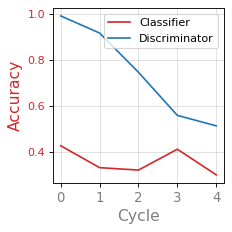

In [17]:
R.plot()